# 4.2 Use of scikit-multiflow

In this notebook, we will use the Python-Package scikit-multiflow (https://scikit-multiflow.github.io). It allows to simulate streaming data.

It is important that you use the "%matplotlib notebook" magic command. Otherwise, the plots won't work

In [127]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Try it out and just play around with the adapting plot. Scikit-multiflow offers various different StreamGenerators which generate artificial data streams

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...


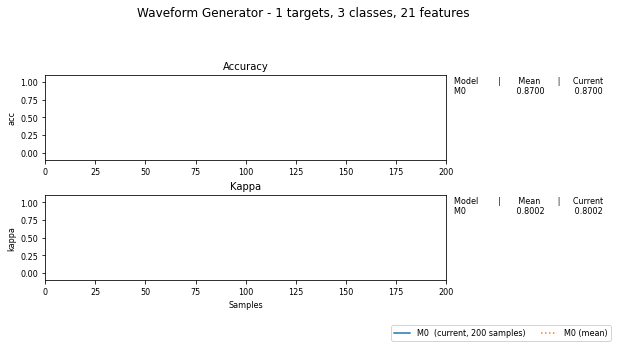

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 #------------------- [5%] [5.96s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 ##------------------ [10%] [8.12s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 ###----------------- [15%] [10.11s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 ####---------------- [20%] [11.27s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 #####--------------- [25%] [12.33s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 ######-------------- [30%] [13.77s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 #######------------- [35%] [15.07s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 ########------------ [40%] [17.93s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 #########----------- [45%] [20.70s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 ##########---------- [50%] [22.82s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 ###########--------- [55%] [24.89s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 ############-------- [60%] [26.38s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 #############------- [65%] [28.27s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 ##############------ [70%] [31.66s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 ###############----- [75%] [33.23s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 ################---- [80%] [34.83s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 #################--- [85%] [36.22s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 ##################-- [90%] [37.62s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 ###################- [95%] [39.01s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 #################### [100%] [40.36s]
Processed samples: 50000
Mean performance:
M0 - Accuracy     : 0.8072
M0 - Kappa        : 0.7102


[GaussianNB()]

In [128]:
from skmultiflow.data.waveform_generator import WaveformGenerator
from skmultiflow.evaluation.evaluate_prequential import EvaluatePrequential
from sklearn.naive_bayes import GaussianNB

# 1. Create a stream
stream = WaveformGenerator()
stream.prepare_for_use()

# 2. Instantiate the Naive Bayes classifier
nb = GaussianNB()

# 3. Setup the evaluator
evaluator = EvaluatePrequential(show_plot=True,
                                pretrain_size=200,
                                batch_size = 100,
                                max_samples=50000)

# 4. Run evaluation
evaluator.evaluate(stream=stream, model=nb)

Load the full Stagger Dataset ("./Data/Stagger_full.csv") and import in a Data Stream (https://scikit-multiflow.github.io/scikit-multiflow/skmultiflow.data.data_stream.html#module-skmultiflow.data.data_stream)

In [129]:
data = pd.read_csv("./Data/Stagger_full.csv")

In [130]:
from util import preprocessing
data_full = preprocessing(data)
data_full.describe()

Color_green      Color_red  Shape_circular  Shape_non-circular  \
count  100000.000000  100000.000000    100000.00000        100000.00000   
mean        0.377330       0.622670         0.44306             0.55694   
std         0.484721       0.484721         0.49675             0.49675   
min         0.000000       0.000000         0.00000             0.00000   
25%         0.000000       0.000000         0.00000             0.00000   
50%         0.000000       1.000000         0.00000             1.00000   
75%         1.000000       1.000000         1.00000             1.00000   
max         1.000000       1.000000         1.00000             1.00000   

               Label  
count  100000.000000  
mean        0.548840  
std         0.497611  
min         0.000000  
25%         0.000000  
50%         1.000000  
75%         1.000000  
max         1.000000

In [131]:
from skmultiflow.data.data_stream import DataStream

stream = DataStream(data = data_full)
stream.prepare_for_use()

next_sample( ) allows to access the next elements of the datastream

In [132]:
stream.next_sample(10000)

(array([[0, 1, 1, 0, 0],
        [0, 1, 1, 0, 0],
        [0, 1, 0, 1, 0],
        ...,
        [0, 1, 1, 0, 2],
        [0, 1, 1, 0, 2],
        [0, 1, 0, 1, 0]]),
 array([1, 1, 1, ..., 0, 0, 1], dtype=int8))

In [133]:
stream.current_sample_x

array([[0, 1, 1, 0, 0],
       [0, 1, 1, 0, 0],
       [0, 1, 0, 1, 0],
       ...,
       [0, 1, 1, 0, 2],
       [0, 1, 1, 0, 2],
       [0, 1, 0, 1, 0]])

In [134]:
stream.current_sample_y

array([1, 1, 1, ..., 0, 0, 1], dtype=int8)

### Task 4.2-1:  Get familiar with stream class
How can you determine the number of remaining samples? How can you restart the stream?

In [135]:
# Code up your solution here

In [136]:
stream.n_remaining_samples

<bound method DataStream.n_remaining_samples of <skmultiflow.data.data_stream.DataStream object at 0x7fb5460f36d0>>

In [137]:
stream.restart()

## Model training & application
Let's train the naive bayes classifier

In [138]:
stream.restart()
print(stream.n_remaining_samples())
X, y = stream.next_sample(10000)

100000


In [139]:
y

array([1, 1, 1, ..., 0, 0, 1], dtype=int8)

In [140]:
from sklearn.metrics import accuracy_score

nb = GaussianNB()
nb.fit(X,y)

y_pred = nb.predict(X)
print(accuracy_score(y, y_pred))

0.8725


### Task 4.2-2: One model training
We stream the remaining data iteratively and evaluate the classifier constantly. Use a for loop and always stream 100 samples (with stream.next_sample()) at a time. First, process the incoming input, compute a prediction and subsequently evaluate your prediction by considering the true labels (which you receive after you computed your prediction). Save the achieved accuracy in a list (*scores*) and plot it.

*Hint: You can use .append() for adding new values to a list*

In [141]:
# Code up your solution here
acc_list = list()
stream.restart()

while stream.n_remaining_samples()>0:
    X,y = stream.next_sample(100)
    y_pred = nb.predict(X)
    acc_list.append(accuracy_score(y, y_pred))


In [142]:
print(len(acc_list))

1000


In [143]:
# Plot results

In [144]:
plt.plot(acc_list)

In [145]:
np.mean(acc_list)

0.51247

In [146]:
np.var(acc_list)

0.06622319909999999

In [147]:
np.max(acc_list)

0.96

In [148]:
np.min(acc_list)

0.17

### Task 4.2-3: Use partial_fit - method for model adaptation
Looks like we are having substantial drift in our data. Naive Bayes implements a partial_fit method which allows to iteratively update the classifier with new data. Update the classifier every time you receive new data of the data stream

(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB.partial_fit) 

In [149]:
# Code up your solution here

In [167]:
acc_partial = list()
stream.restart()
while stream.n_remaining_samples()>0:
    X,y = stream.next_sample(100)
    y_pred = nb.predict(X)
    nb.partial_fit(X,y)
    acc_partial.append(accuracy_score(y, y_pred))


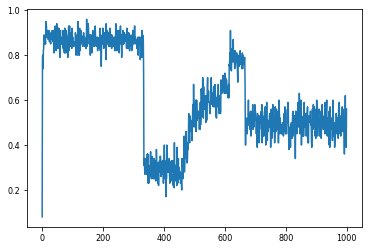

In [168]:
plt.plot(acc_partial)

This can also be visualized with the evaluate_prequential method of scikit-multiflow. If a prediction model of scikit-learn implements the partial_fit-method, this is automatically used by scikit-multiflow.

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 10000 sample(s).
Evaluating...
 ##------------------ [10%] [0.01s]

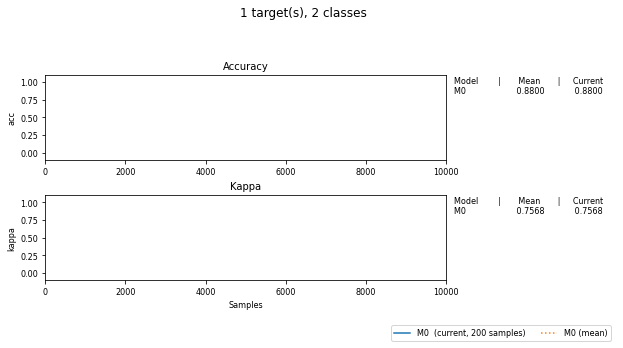

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 ###----------------- [15%] [1.27s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 ####---------------- [20%] [2.02s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 #####--------------- [25%] [2.74s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 ######-------------- [30%] [3.29s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 #######------------- [35%] [3.81s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 ########------------ [40%] [4.31s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 #########----------- [45%] [4.76s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 ##########---------- [50%] [5.38s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 ###########--------- [55%] [5.97s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 ############-------- [60%] [6.59s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 #############------- [65%] [7.09s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 ##############------ [70%] [7.72s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 ###############----- [75%] [8.43s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 ################---- [80%] [9.31s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 #################--- [85%] [9.84s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 ##################-- [90%] [10.41s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 ###################- [95%] [10.93s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 #################### [100%] [11.41s]
Processed samples: 100000
Mean performance:
M0 - Accuracy     : 0.5904
M0 - Kappa        : 0.1811


[GaussianNB()]

In [169]:
stream.restart()

nb = GaussianNB()

evaluator = EvaluatePrequential(show_plot=True,
                                batch_size = 100,
                                pretrain_size=10000,
                                max_samples=100000)

evaluator.evaluate(stream=stream, model=nb)

### Task 4.2-4: Use constant retraining of the model
The scores are getting better, but partial_fit seems to adapt to slowly to the existing concept drift. Always retrain a new prediction model when you receive new data.

Afterwards, summarize all your findings. Plot the accuracy trajectory of each of the tasks (4.2-2, 4.2-3, 4.2-4) and print the mean accuracy over the whole time frame.

In [170]:
# Code up your solution here

In [171]:
acc_fullfit = list()
stream.restart()
while stream.n_remaining_samples()>0:
    X,y = stream.next_sample(100)
    y_pred = nb.predict(X)
    nb.fit(X,y)
    acc_fullfit.append(accuracy_score(y, y_pred))

In [172]:
plt.plot(acc_fullfit)

In [173]:
# Plot

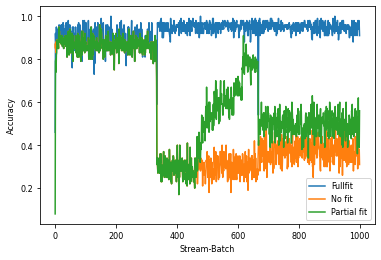

In [174]:
plt.plot(acc_fullfit, label='Fullfit')
plt.plot(acc_list, label='No fit')
plt.plot(acc_partial, label= 'Partial fit')
plt.xlabel('Stream-Batch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()